In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_path = "../processed_data/" + '2perc_sample.parquet'

In [ ]:
df = pd.read_parquet(data_path, engine='fastparquet')

In [ ]:
df.pickup_datetime = df.pickup_datetime.astype('datetime64[ns]')
df.dropoff_datetime = df.dropoff_datetime.astype('datetime64[ns]')

In [ ]:
df["pickup_year"] = df.pickup_datetime.dt.year
df["dropoff_year"] = df.dropoff_datetime.dt.year

In [ ]:
df["pickup_year_month"] = df.pickup_datetime.dt.year.astype('str') + "_" + df.pickup_datetime.dt.month.astype('str')
df["dropoff_year_month"] = df.dropoff_datetime.dt.year.astype('str') + "_" + df.dropoff_datetime.dt.month.astype('str')

In [ ]:
# year counts

df[df.pickup_taxizone_id.notnull()][["pickup_year", "pickup_taxizone_id"]].groupby("pickup_year").agg("count")

In [8]:
# year counts

df[df.pickup_taxizone_id.notnull()][["pickup_year", "pickup_taxizone_id"]].groupby("pickup_year").agg("count")

,pickup_taxizone_id
pickup_year,
2008,9
2009,3349160
2010,3287822
2011,3436046
2012,3477364
2013,3417176
2014,3638963
2015,4183929
2016,4776798


In [9]:
# sample

df.sample(50)

# we see that some pickup_taxizone_id are nans, could be dropped if needed

,pickup_datetime,pickup_taxizone_id,dropoff_datetime,dropoff_taxizone_id,trip_type,pickup_year,dropoff_year
__null_dask_index__,,,,,,,
52141,2010-11-14 22:12:51,161.0,2010-11-14 22:20:58,107.0,yellow,2010,2010.0
48537,2011-08-20 01:49:00,186.0,2011-08-20 01:52:00,164.0,yellow,2011,2011.0
405032,2015-03-25 09:36:39,141.0,2015-03-25 10:02:34,107.0,yellow,2015,2015.0
779867,2018-05-01 08:49:34,NaN,2018-05-01 09:18:13,NaN,fhv,2018,2018.0
280414,2012-11-05 14:17:49,262.0,2012-11-05 14:23:37,140.0,yellow,2012,2012.0
721004,2017-10-05 21:36:26,170.0,2017-10-05 21:49:05,249.0,yellow,2017,2017.0
290884,2012-08-07 22:19:00,NaN,2012-08-07 22:20:00,NaN,yellow,2012,2012.0
595833,2017-03-21 10:34:44,234.0,2017-03-21 10:48:12,161.0,yellow,2017,2017.0
42155,2010-08-26 20:07:09,181.0,2010-08-26 20:34:20,257.0,yellow,2010,2010.0


In [54]:
# rides by type per year & month

df["pickup_yearmonth"] = (df.pickup_datetime.dt.year.astype(int) - 2008) * 12 + df.pickup_datetime.dt.month.astype(int)

monthly = df[df.pickup_taxizone_id.notnull()][
    ["pickup_yearmonth", "trip_type", "pickup_taxizone_id"]
].groupby(["pickup_yearmonth", "trip_type"]).agg("count")

monthly = monthly.reset_index()

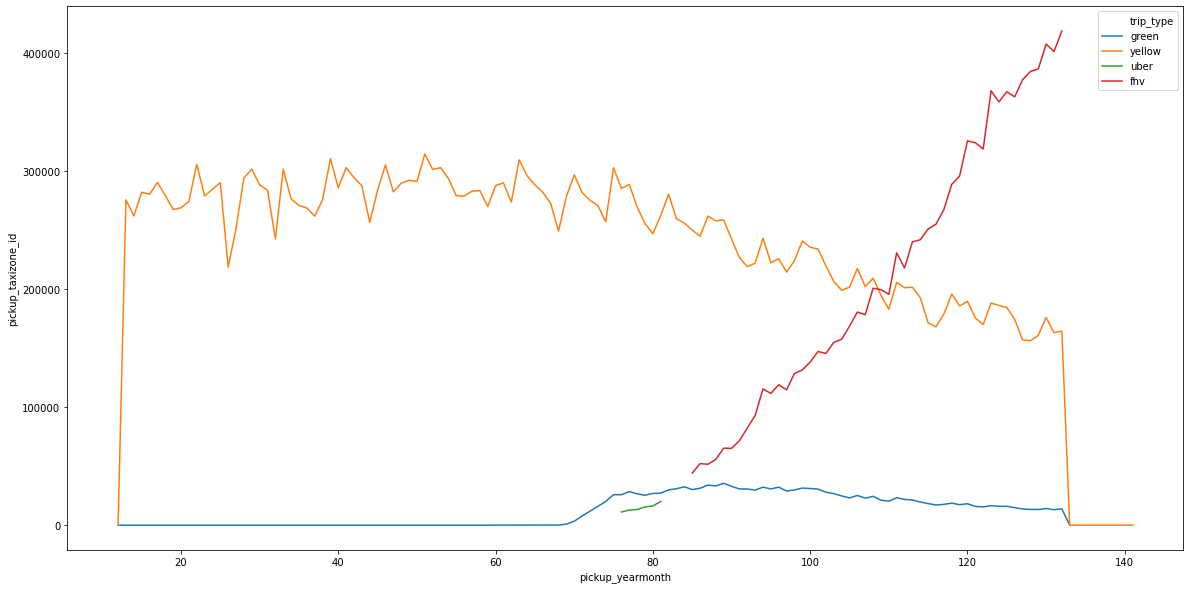

In [55]:
plt.figure(figsize=(20, 10))
sns.lineplot(
    x="pickup_yearmonth",
    y="pickup_taxizone_id",
    hue="trip_type",
    data=monthly
)
